# All Subjects ERPs Analysis

## Load data and perform piperline for all subjects

In [1]:
%%capture

import sys
sys.path.append("..")

import mne
import os
from mne_bids import BIDSPath, read_raw_bids
from matplotlib import pyplot as plt
from src.utils import load_subject, pipeline
from src.plots import plot_ERPs


# Set BIDS path
bids_path = BIDSPath(root='../data', task='jacobsen', suffix='eeg')

# List of all subject BIDS path
all_sub_paths = bids_path.match()

# Create dictionary to store individual subject ephochs and evoked
sub_epochs = {'regular': [], 'random': []}
sub_evoked = {'regular': [], 'random': []}


for sub_path in all_sub_paths:
        # Load data
        raw = load_subject(sub_path)

        ## Execute filtering + cleaning data pipeline
        raw, epochs = pipeline(
            raw,
            tmin = -1,
            tmax = 1,
            reject_amp = 100e-6, #±μ100 (if commented out doea not reject components)
            perform_ica = False # ICA doesn't drop any componens
        )

        # Save individual subject epochs and evoked 
        sub_epochs['regular'].append(epochs['regular'])
        sub_epochs['random'].append(epochs['random'])
        sub_evoked['regular'].append(epochs['regular'].average())
        sub_evoked['random'].append(epochs['random'].average())


## Save ERPs plots for every subject

In [2]:
%%capture

for i, sub in enumerate(all_sub_paths):
    
    sub_name= str(sub)[8:15]
    print(sub_name)
    
    epochs = {
        'regular': sub_epochs['regular'][i],
        'random': sub_epochs['random'][i]
    }
    
    # Create the directory if it doesn't exist
    os.makedirs(f'../plots/{sub_name}', exist_ok=True)

    # Save plots
    save_path = f'../plots/{sub_name}/{sub_name}_erp'
    plot_ERPs(epochs, title=f'{sub_name} - ERPs', save_path=save_path)

### Grand Average

Identifying common channels ...


Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


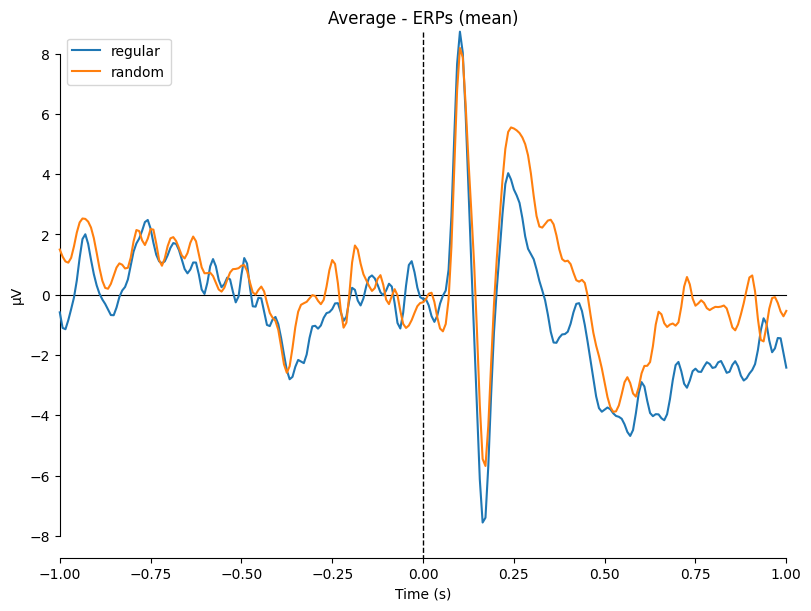

Plot saved as ../plots/sub-avg/sub-avg_erp


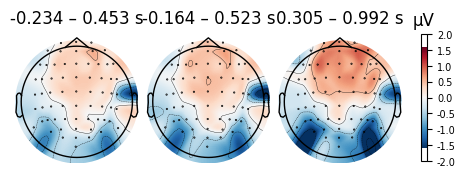

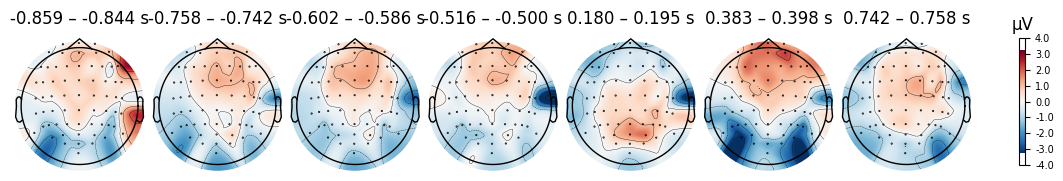

In [6]:

grand_avg= {'regular': mne.grand_average(sub_evoked['regular']), 
            'random': mne.grand_average(sub_evoked['random'])}
    
# Create the directory if it doesn't exist
os.makedirs(f'../plots/sub-avg', exist_ok=True)

# Save plots
save_path = f'../plots/sub-avg/sub-avg_erp'
plot_ERPs(epochs, title=f'Average - ERPs', save_path=save_path)


In [ ]:
# Topomaps
combo = [grand_avg['regular'],grand_avg['random']]
mne.combine_evoked(combo, weights=[1, -1]).plot_topomap(times=[0.11, 0.18, 0.65], average=0.7)
mne.combine_evoked(combo, weights=[1, -1]).plot_topomap(times="peaks", average=0.03)
plt.show()